In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import xarray as xr
import matplotlib.pyplot as plt
import datetime
from datetime import datetime
from scipy import signal
import scipy.stats as stats

#load observed NSIDC Sea Ice Extent ('Extent') that has been regridded on sipn grid    
filepath = '/home/disk/sipn/nicway/data/obs/NSIDC_extent/sipn_nc/'  #observed sea ice extent data
filename = 'N_seaice_extent_daily_v3.0.nc'

#time is in units of days since 1978-10-26
times = pd.date_range('1978-10-26',datetime.today(),freq='D')
#open SIC data with xarray
f_SIC = xr.open_dataset(filepath+filename)
SIC_np = f_SIC.values #converts to np.array

#get time (in datetime format)
time2 = f_SIC.datetime
#print(time2.dt)
months = time2.dt.month
days = time2.dt.day
years = time2.dt.year
months = np.array(months)
days = np.array(days)
years = np.array(years)
#TIME = np.hstack((np.transpose(years),np.transpose(months),np.transpose(days)))
TIME = np.transpose(np.stack([years,months,days]))
print(TIME)
#np.transpose(years).shape
#SIC2 = xr.Dataset({filepath+filename})

[[1978   10   26]
 [1978   10   28]
 [1978   10   30]
 ...
 [2019    7   12]
 [2019    7   13]
 [2019    7   14]]


<xarray.Variable (datetime: 13221)>
array([10.231, 10.42 , 10.557, ...,  7.9  ,  7.856,  7.803])
Attributes:
    units:    10^6 sq km
    Missing:  10^6 sq km
<xarray.Variable (datetime: 13221)>
array([-1.127599, -0.938599, -0.801599, ..., -3.458599, -3.502599, -3.555599])


Text(0.5, 1.0, 'Sea Ice Extent from NSIDC, 1978-2019')

/home/disk/sipn/mcmcgraw/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


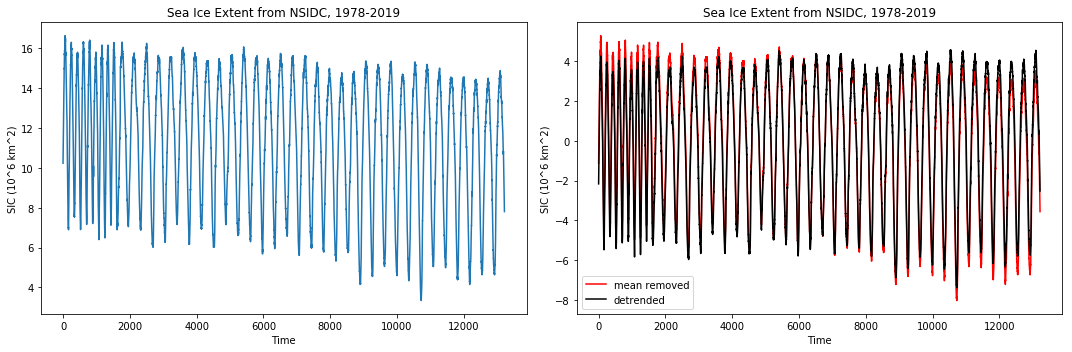

In [39]:
#read in SIC.  It is a time series. Plot the time series, and the time series with its mean removed
SIC = f_SIC.variables['Extent'] 
SIC_mean_rem = SIC - np.nanmean(SIC)
print(SIC)
print(SIC_mean_rem)
#Remove linear trend
SIC_dt = signal.detrend(SIC)
#fig1 = plt.figure()
#ax1 = fig1.add_axes([0.1,0.1,0.8,0.8])
#ax1.plot(SIC)
#ax1.plot(SIC_mean_rem,'r')
#plt.xlabel('Time')
#plt.ylabel('Sea Ice Concentration (10^6 km^2)')
#plt.title('Sea Ice Extent from NSIDC, 1978-2019')
#ax1.legend(['SIC','mean removed'])
#ax1.xticks([0:181:31])
#fig2 = plt.figure()
#ax2 = fig2.add_axes([0.1,0.1,0.8,0.8])
#ax2.plot(SIC_mean_rem,'r')
#plt.xlabel('Time') 
#plt.ylabel('Sea Ice Concentration (10^6 km^2)')
#plt.title('Sea Ice Extent from NSIDC (mean removed), 1978-2019')
fig1, (ax1a, ax1b) = plt.subplots(1,2, figsize=(15,5),tight_layout = True)
ax1a.plot(SIC)
ax1a.set_xlabel('Time')
ax1a.set_ylabel('SIC (10^6 km^2)')
ax1a.set_title('Sea Ice Extent from NSIDC, 1978-2019')
#
ax1b.plot(SIC_mean_rem,'r')
ax1b.plot(SIC_dt,'k')
ax1b.set_xlabel('Time')
ax1b.set_ylabel('SIC (10^6 km^2)')
ax1b.legend(['mean removed','detrended'])
ax1b.set_title('Sea Ice Extent from NSIDC, 1978-2019')
#
#ax1c.plot(SIC_dt,'k')
#ax1c.set_xlabel('Time')
#ax1c.set_ylabel('SIC (10^6 km^2)')
#ax1c.set_title('Sea Ice Extent from NSIDC (detrended), 1978-2019')
#

13221
13221
13221


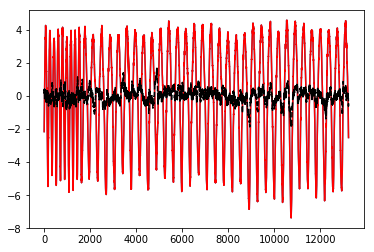

In [40]:
#Create running mean
nday = 1  #number of days for running mean
SIC_run_mean = np.convolve(SIC_dt,np.ones((nday,))/nday,mode='valid')
plt.plot(SIC_dt)
plt.plot(SIC_run_mean,'r')
N = len(TIME) #number of time steps we have
TIME_rm = TIME[0:N-nday+1,:]
print(N)
print(len(TIME_rm))
print(len(SIC_run_mean))
##Remove seasonal cycle. For now we'll do +/- 2 days of the actual date
SIC_seasonal_cycle = np.array([])
N = len(TIME_rm)
for iseas in np.arange(0,N):
    idate = TIME_rm[iseas,:]
    ind_sel = np.where((TIME_rm[:,1] == idate[1]) & ((idate[2]-2 <= TIME_rm[:,2]) & (TIME_rm[:,2] < idate[2]+2)))
    SIC_seasonal_cycle = np.append(SIC_seasonal_cycle,(SIC_run_mean[iseas,] - np.nanmean(SIC_run_mean[ind_sel,])))
    
plt.plot(SIC_seasonal_cycle,'k--')

Text(0.5, 1.0, 'JJAS SIC, seasonal cycle removed (1 day mean)')

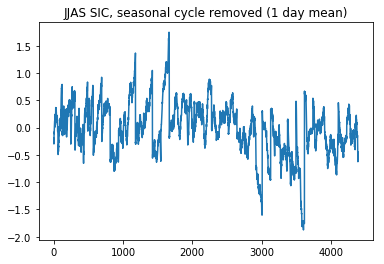

In [41]:
##Select only months we want
mon_sel = [6,7,8,9] #start w JJAS
mon_sel_ind = np.isin(months[0:len(TIME)-nday+1],mon_sel)
#print(mon_sel_ind)
#print(sum(mon_sel_ind)) make sure number of TRUEs makes sense

SIC_mon_sel = SIC_seasonal_cycle[np.where(mon_sel_ind == True)]
plt.plot(SIC_mon_sel)
plt.title('JJAS SIC, seasonal cycle removed (1 day mean)')

Text(0.5, 0, 'SIC (10^6 km^2)')

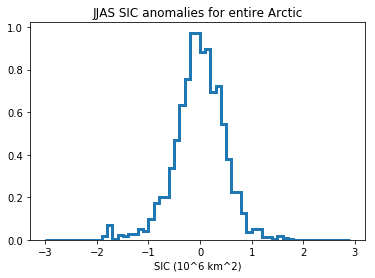

In [42]:

#histogram of JJAS SIC 
fig = plt.figure()
plt.hist(SIC_mon_sel,bins=np.arange(-3,3,0.1),histtype=u'step', density=True,linewidth=3)
#plt.plot(SIC_pde)
#sns.distplot(SIC_mon_sel,hist=False,kde=True,kde_kws={'linewidth':4})
plt.title('JJAS SIC anomalies for entire Arctic')
plt.xlabel('SIC (10^6 km^2)')

(13217,)


Text(0.5, 0, 'change in SIC (10^6 km^2)')

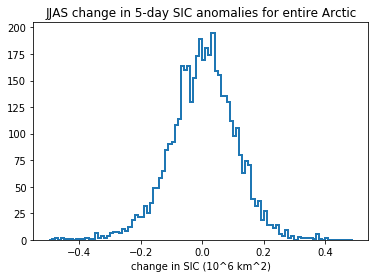

In [54]:
##now look at change in SIC -/+ 2 days
SIC_delta = np.array([])
pm_days = 2

for idelta in np.arange(pm_days,len(SIC_seasonal_cycle)-pm_days):
    SIC_idelta = SIC_seasonal_cycle[idelta+pm_days] - SIC_seasonal_cycle[idelta-pm_days]
    SIC_delta = np.append(SIC_delta,SIC_idelta)

    
print(SIC_delta.shape)
SIC_delta_sel = SIC_delta[np.where(mon_sel_ind[pm_days:len(mon_sel_ind)-pm_days] == True)]    

plt.hist(SIC_delta_sel,bins=np.arange(-0.5,0.5,0.01),histtype=u'step',linewidth=2)
plt.title('JJAS change in 5-day SIC anomalies for entire Arctic')
plt.xlabel('change in SIC (10^6 km^2)')